# Ghouls-Goblins-Ghosts
Dataset visualization for kaggle problem

## Formatting 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, StandardScaler
%matplotlib inline

In [2]:
train = pd.read_csv('resources/train.csv')
test = pd.read_csv('resources/test.csv')

In [3]:
train.shape, test.shape

((371, 7), (529, 6))

In [4]:
train.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
3,4,0.776652,0.508723,0.636766,0.884464,black,Ghoul
4,5,0.566117,0.875862,0.418594,0.636438,green,Ghost


In [5]:
train_y = train['type']
train_x = train.drop(['id', 'type'], axis=1)

In [6]:
test.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color
0,3,0.471774,0.387937,0.706087,0.698537,black
1,6,0.427332,0.645024,0.565558,0.451462,white
2,9,0.549602,0.491931,0.660387,0.449809,black
3,10,0.638095,0.682867,0.471409,0.356924,white
4,13,0.361762,0.583997,0.377256,0.276364,black


In [7]:
test_x = test.drop(['id'], axis=1)

In [8]:
dataset = pd.concat([train_x, test_x], axis=0)

In [9]:
dataset.shape

(900, 5)

## Preprocessing

Check for missing values

In [10]:
for col in dataset.columns:
    if np.any(pd.isnull(dataset[col])):
        print(col)

Convert categorical attributes to numeric

In [11]:
set(dataset['color'])

{'black', 'blood', 'blue', 'clear', 'green', 'white'}

In [12]:
encoder = LabelEncoder()
dataset['color'] = encoder.fit_transform(dataset['color'])

In [13]:
set(train_y)

{'Ghost', 'Ghoul', 'Goblin'}

In [14]:
encoder = LabelBinarizer()
train_y = encoder.fit_transform(train_y)

In [15]:
dataset.head()

,bone_length,rotting_flesh,hair_length,has_soul,color
0,0.354512,0.350839,0.465761,0.781142,3
1,0.575560,0.425868,0.531401,0.439899,4
2,0.467875,0.354330,0.811616,0.791225,0
3,0.776652,0.508723,0.636766,0.884464,0
4,0.566117,0.875862,0.418594,0.636438,4


## Normalization 

In [16]:
normalize = StandardScaler()
dataset = normalize.fit_transform(dataset)

In [17]:
dataset

array([[-0.55352147, -1.00416702, -0.33005656,  1.76375272, -0.24332911],
       [ 1.08789151, -0.51531896,  0.05406109, -0.15279153,  0.3735616 ],
       [ 0.28826969, -0.98141913,  1.69383282,  1.82038426, -2.09400126],
       ..., 
       [ 0.60476305, -0.04308772,  1.08760456,  1.38752468,  0.99045231],
       [-0.72460763,  1.69970305, -1.0764836 , -1.53704571, -0.24332911],
       [-1.27917377,  1.21735271, -0.62594951, -0.6634746 ,  0.99045231]])

In [18]:
train_x = dataset[:train_x.shape[0],:]
test_x = dataset[train_x.shape[0]:,:]

In [19]:
train_x.shape, test_x.shape

((371, 5), (529, 5))

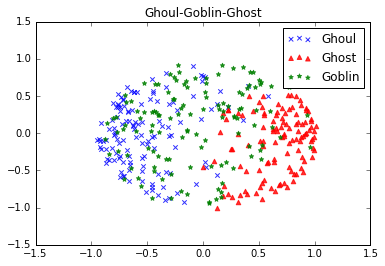

In [28]:
model = KernelPCA(n_components=2, kernel='cosine', gamma=10)
decomposed_data = model.fit_transform(train_x)
plt.figure()
plt.scatter(decomposed_data[np.where(train['type'] == 'Ghoul'), 0],
            decomposed_data[np.where(train['type'] == 'Ghoul'), 1],
        marker='x', color='b',
        alpha=0.8, label='Ghoul')
plt.scatter(decomposed_data[np.where(train['type'] == 'Ghost'), 0],
            decomposed_data[np.where(train['type'] == 'Ghost'), 1],
        marker='^', color='r',
        alpha=0.8, label='Ghost')
plt.scatter(decomposed_data[np.where(train['type'] == 'Goblin'), 0],
            decomposed_data[np.where(train['type'] == 'Goblin'), 1],
        marker='*', color='g',
        alpha=0.8, label='Goblin')
plt.legend(loc='best')
plt.title('Ghoul-Goblin-Ghost')
plt.show()

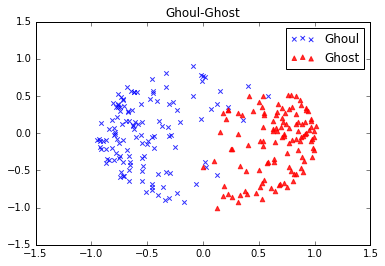

In [29]:
plt.figure()
plt.scatter(decomposed_data[np.where(train['type'] == 'Ghoul'), 0],
            decomposed_data[np.where(train['type'] == 'Ghoul'), 1],
        marker='x', color='b',
        alpha=0.8, label='Ghoul')
plt.scatter(decomposed_data[np.where(train['type'] == 'Ghost'), 0],
            decomposed_data[np.where(train['type'] == 'Ghost'), 1],
        marker='^', color='r',
        alpha=0.8, label='Ghost')
plt.legend(loc='best')
plt.title('Ghoul-Ghost')
plt.show()

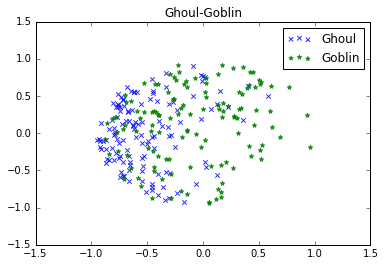

In [30]:
plt.figure()
plt.scatter(decomposed_data[np.where(train['type'] == 'Ghoul'), 0],
            decomposed_data[np.where(train['type'] == 'Ghoul'), 1],
        marker='x', color='b',
        alpha=0.8, label='Ghoul')
plt.scatter(decomposed_data[np.where(train['type'] == 'Goblin'), 0],
            decomposed_data[np.where(train['type'] == 'Goblin'), 1],
        marker='*', color='g',
        alpha=0.8, label='Goblin')
plt.legend(loc='best')
plt.title('Ghoul-Goblin')
plt.show()

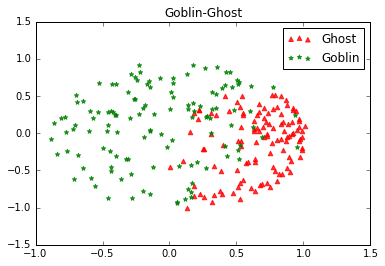

In [31]:
plt.figure()
plt.scatter(decomposed_data[np.where(train['type'] == 'Ghost'), 0],
            decomposed_data[np.where(train['type'] == 'Ghost'), 1],
        marker='^', color='r',
        alpha=0.8, label='Ghost')
plt.scatter(decomposed_data[np.where(train['type'] == 'Goblin'), 0],
            decomposed_data[np.where(train['type'] == 'Goblin'), 1],
        marker='*', color='g',
        alpha=0.8, label='Goblin')
plt.legend(loc='best')
plt.title('Goblin-Ghost')
plt.show()

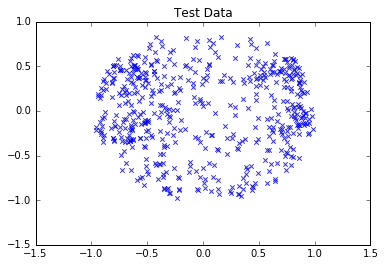

In [32]:
model = KernelPCA(n_components=2, kernel='cosine', gamma=10)
decomposed_data = model.fit_transform(test_x)
plt.figure()
plt.scatter(decomposed_data[:, 0],
            decomposed_data[:, 1],
        marker='x', color='b',
        alpha=0.8)
plt.title('Test Data')
plt.show()

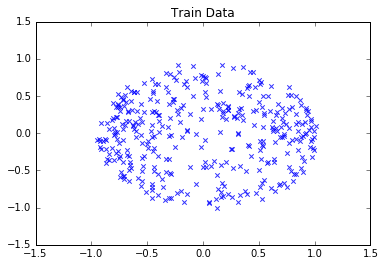

In [33]:
model = KernelPCA(n_components=2, kernel='cosine', gamma=10)
decomposed_data = model.fit_transform(train_x)
plt.figure()
plt.scatter(decomposed_data[:, 0],
            decomposed_data[:, 1],
        marker='x', color='b',
        alpha=0.8)
plt.title('Train Data')
plt.show()